# Nama : M.Alfat Hayatur Rizon

# Nim : 09011381823120

# Artificial Neural Network

### Import Library

In [2]:
import numpy as np

### Tentukan jenis fungsi aktivasi yang akan digunakan 

Fungsi aktivasi yang akan digunakan adalah Sigmoid yang biasanya digunakan pada metode backpropagation
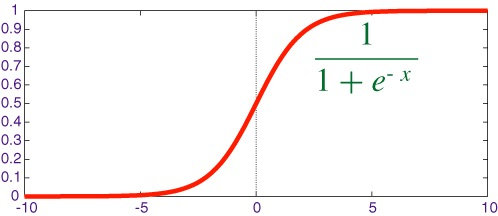

In [3]:
# define the sigmoid function
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

### Tentukan Learning rate

Learning rate biasanya digunakan untuk mengkontrol seberapa cepat jaringan belajar, seperti seberapa cepat program mengecek loss dan seberapa cepat dan seberapa banyak weight (bobot) yang akan dirubah untuk memperkecil error. Jika memiliki Learning rate yang kecil, maka bobot perlu melihat nilai input lebih sering sebelum melakukan perubahan, yang menyebabkan program akan membutuhkan waktu yang lebih lama untuk belajar. Tetapi dengan hal itu juga akan membuat program lebih stabil dan lebih tahan terhadap noise (errors) dan data yang tidak akurat

In [4]:
# Define the learning rate
learning_rate = 0.4

### Set input dataset

##### Input

In [5]:
# input dataset, we make 5 fields, each fields we have 3 input nodes and 1 target output nodes
X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1],[1,0,0]])
print(X)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]
 [1 0 0]]


| Feature1 | Feature2 | Feature3 | Target |
| :-: | :-: | :-: | :-: |
| 0 | 0 | 1 | 0 |
| 1 | 1 | 1 | 1 |
| 1 | 0 | 1 | 1 |
| 0 | 1 | 1 | 0 |
| 1 | 0 | 0 | 1 |

##### Bias

Fungsi dari memasukkan bias dengan nilai 1 adalah, dimisalkan ketika seluruh nilai fitur input kita 0 semua, sehingga apapun nilai weight nya, pasti akan selalu menghasilkan nilai 0, untuk menghindari hal tersebut maka dibuat lah 1 buah input nodes dengan nilai 1 yang biasa disebut Bias Term

In [6]:
X = np.concatenate((np.ones((len(X), 1)), X), axis = 1)
print(X)

[[1. 0. 0. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 1.]
 [1. 1. 0. 0.]]


### Hasil input dan Bias

| Bias | Feature1 | Feature2 | Feature3 | Target |
| :-: | :-: | :-: | :-: | :-: |
| 1 | 0 | 0 | 1 | 0 |
| 1 | 1 | 1 | 1 | 1 |
| 1 | 1 | 0 | 1 | 1 |
| 1 | 0 | 1 | 1 | 0 |
| 1 | 1 | 0 | 0 | 1 |

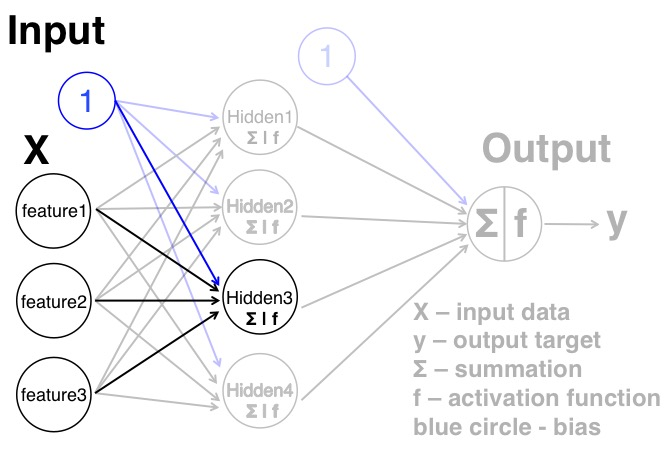

### Inisiasi Output

In [7]:
y = np.array([[0],[1],[1],[0],[1]])
print(y)

[[0]
 [1]
 [1]
 [0]
 [1]]


### Inisiasi nilai weight (bobot) secara random dengan rata rata 0

In [8]:
# weights_0 for hidden layer weight
# (we make weights_0 as array 4,4 because we have 4 fields, with 4 input nodes)
weights_0 = 2*np.random.random((4,4)) - 1
print(weights_0)


# weights_1 for output layer weight
# (we make weights_1 as array 5,1 because we have 4 hidden layer + 1 bias term, with 1 value for each hidden layer and bias term)
weights_1 = 2*np.random.random((5,1)) - 1
print(weights_1)

[[-0.19121383 -0.73961409  0.67009377 -0.35031081]
 [ 0.45580208 -0.06593413  0.16966491  0.81533121]
 [ 0.0373288   0.86963003  0.38861729 -0.16735436]
 [ 0.51734983  0.06633223  0.9934546   0.49852089]]
[[ 0.22138174]
 [-0.56614833]
 [-0.0358564 ]
 [ 0.92239205]
 [-0.09329045]]


### Train model untuk 60000 iterasi

In [9]:
np.random.seed(1)

# training the model for 60000 iterations
for j in range(60000):

    # Feed forward through layers 0, 1, and 2
    # input layer
    layer_0 = X
    # layer_1_output is the output from the hidden layer
    layer_1_output = sigmoid(np.dot(layer_0,weights_0))
    # Note here we add a bias term before we feed them into the output layer
    layer_1_output = np.concatenate((np.ones((len(layer_1_output), 1)), layer_1_output), axis = 1)

    
    # layer_2_output is the estimation the model made using current weights
    layer_2_output = sigmoid(np.dot(layer_1_output,weights_1))
    #print(layer_2_output)

    # how much did we miss the target value?
    layer2_error = y - layer_2_output
   
    if(j% 10000) == 0:
        print("Error ke : ", j)
        print("Error : ", str(np.mean(np.abs(layer2_error))))
        

    # How much we will change for the weights connect hidden layer
    # and output layer
    layer2_delta = learning_rate*layer2_error*sigmoid(layer_2_output,deriv=True)

    # how much did each hidden node value contribute to the output error (according to the weights)?
    layer1_error = layer2_delta.dot(weights_1.T)

    # How much we will change for the weights connect the input layer
    # and the hidden layer
    layer1_delta = learning_rate*layer1_error * sigmoid(layer_1_output,deriv=True)

    # update the weights
    weights_1 += layer_1_output.T.dot(layer2_delta)
    weights_0 += layer_0.T.dot(layer1_delta[:, 1:])

Error ke :  0
Error :  0.4763921988695004
Error ke :  10000
Error :  0.01834963958662606
Error ke :  20000
Error :  0.012008571716465053
Error ke :  30000
Error :  0.009518903424191438
Error ke :  40000
Error :  0.00810818908885171
Error ke :  50000
Error :  0.007173485641636587


### Perhitungan

#### Feed Forward (Propagasi Maju)

Feed Forward memiliki fungis untuk menhitung nilai loss dan nilai error

Sebenarnya bisa langsung menambahkan seluruh nilai masing masing bobot dikali masing masing input seperti dibawah ini, lalu langsung dimasukkan dalam fungsi aktivasi sigmoid
1. Pertama hitung nilai z dulu dengan rumus seperti dibawah
\begin{align*}
z = (w1 * x1 + w2 * x2 + w3 * x3)
\end{align*}
\begin{align*}
z1 = (w1.1 * x1 + w2.1 * x2 + w3.1 * x3)
\end{align*}
\begin{align*} 
z2 = (w1.2 * x1 + w2.2 * x2 + w3.2 * x3) 
\end{align*}
\begin{align*}
z3 = (w1.3 * x1 + w2.3 * x2 + w3.3 * x3)
\end{align*}
\begin{align*}
z4 = (w1.4 * x1 + w2.4 * x2 + w3.4 * x3)
\end{align*}

dimana : 
x = input nodes
w = bobot yang menghubungkan input layer dan hidden layer


2. Setelah menghitung nilai z, barulah kita hitung nilai aktivasi untuk setiap hidden layer, karena menggunakan sigmoid, maka rumusnya seperti dibawah ini
\begin{align*}
sigmoid = \frac{1} {1 + e^{z}}
\end{align*}
\begin{align*}
b1 = \frac{1} {1 + e^{z1}}
\end{align*}
\begin{align*}
b2 = \frac{1} {1 + e^{z2}}
\end{align*}
\begin{align*}
b3 = \frac{1} {1 + e^{z3}}
\end{align*}
\begin{align*}
b4 = \frac{1} {1 + e^{z4}}
\end{align*}

dimana 
b = output pada hidden layer yang telah melewati fungsi aktivasi sigmoid

3. Setelah perhitungan sigmoid, tambahkan satu nilai 1 untuk Bias term sehingga tadi yang arraynya (1,4) menjadi (1,5) dan menjadi layer1Output
\begin{align*}
layer1Output = [[biasTerm,
b1,
b2,
b3,
b4]]
\end{align*}


4. Lalu hasil output dari layer 1 (hidden layer), akan dihitung dengan cara yang sama dengan menggunakan fungsi aktivasi sigmoid juga untuk bagian output layer, output memiliki 2 buah layer, sedangkan output dari layer hidden memiliki array(5,1) maka dengan cara yang sama kita akan menghitung nilai layer_2_output yang diinisialkan dengan (j) dan weights_1 yang dimisalkan (k)
\begin{align*}
j1 = (k1.1 * b1 + k2.1 * b2 + k3.1 * b3)
\end{align*}

Lalu hitung nilai sigmoid function activationnya dimana outputnya dimisalkan (p)
\begin{align*}
p1 = \frac{1} {1 + e^{j1}}
\end{align*}


5. Kemudian dihitung hasil errornya dengan mengurangi nilai output target yang diminta dengan nilai p1
\begin{align*}
layer2Error = y - p1
\end{align*

#### Back Propagation ( Propagasi Mundur)

Umumnya fungsi dari Back Propagation ini adalah untuk menghitung kembali nilai weights (bobot) dan menggantinya untuk mempperkecil nilai error

6. Ketika ada error, maka yang dialkukan selanjutnya adalah menghitung berap banyak nilai bobot yang perlu di rubah antara hidden layer dan output layer terlebih dahulu, karena tidak bisa langsung ke bobot input tapi harus bertahap. Perhitungannya adalah dengan cara mengalikan learning_rate dengan error pada layer 2 dan menggunakan sigmoid untuk output pada layer 2 (output layer) dengan fungsi yang deriv=True dimana sudah didefinisikan diatas jika deriv bernilai true maka rumusnya x*(1-x)
\begin{align*}
layer2Ddelta = learningRrate * layer2Error * sigmoid(layer2output,deriv=True)
\end{align*}
dimana : 
\begin{align*}
learningRate = 0.4
\end{align*}

\begin{align*}
layer2Error = y - p1
\end{align*}

\begin{align*}
sigmoid(layer2Output,deriv=True) : \frac{layer2Output} {1 - layer2Output}
\end{align*}

7. Lalu kita mundur satu layer lagi untuk melihat seberapa besar kontribusi layer input ke layer hidden terhadap error output berdasarkan bobotnya dengan mengalikan layer2Delta dengan nilai bobot dari hidden ke output sebelumnya dengan mengubah kolom menjadi baris dan baris menjadi kolom
\begin{align*}
layer1Error = layer2Delta.dot(weights1.T)
\end{align*}
dimana :
weights1 = nilai bobot dari hidden layer menuju output layer saat feed forward sebelumnya
layer2Delta = jumlah perubahan terhadap bobot yang terkoneksi dari hidden layer dan output layer

8. Setelah mengetaui berapa besar nilai input layer ke hidden layer yang berkontribusi terhadap errornya hasil output, maka sekarang kita harus mencari berapa besar perubahan yang harus dilakukan terhadap nilai bobot yang menghubungkan input layer dan hidden layer dengan cara yang sama dengan mencari berapa besar perubahan nilai weight antara hidden layer dan output layer
\begin{align*}
layer1Delta = learningRate* layer1Error * sigmoid(layer1Output,deriv=True)
\end{align*}
dimana : 
\begin{align*}
learningRate = 0.4
\end{align*}

\begin{align*}
layer2Error = layer2Delta.dot(weights1.T)
\end{align*}

\begin{align*}
sigmoid(layer1Output,deriv=True) : \frac{layer1Output} {1 - layer1Output}
\end{align*}


9. Setelah kita mengetahui berapa besar nilai bobot yang perlu dirubah, baik bobot yang menghubungkan input layer dan hidden layer (weights0) dan bobot yang menghubungkan hidden layer dan output layer (weights1), lalu sekarang kita ganti nilai weights nya

a. untuk bobot antara hidden layer dan output layer (weights1)
\begin{align*}
 weights1 += layer1Output.T.dot(layer2Delta)
\end{align*}
\begin{align*}
 weights1 = weights1 + (layer1Output.T.dot(layer2Delta))
\end{align*}

b. untuk bobot antara input layer dan hidden layer (weights0) 
\begin{align*}
 weights0 += layer0.T.dot(layer1_delta[:, 1:])
\end{align*}
\begin{align*}
 weights0 = weights0 + (layer0.T.dot(layer1_delta[:, 1:]))
\end{align*}


Ketika sebuah program artificial neural network telah melakukan satu kali feed forward dan satu kali back propagation, artinya program tersebut telah melakukan satu Epoh ( 1 kali iterasi (perulangan)), jika kita memberikan 60000 iterasi maka, program akan mengulang feed forward dan back propagation sebanyak 60000 kali maju dan mundur, tujuannya hanya satu untuk mendapat nilai error terkecil dan convergence.

sumber : https://github.com/qingkaikong/20161202_ANN_basics/blob/master/notebooks/02_ANN_step_by_step_MLP.ipynb